<a href="https://colab.research.google.com/github/RaimundoLorca/roboticafcfm2021-2/blob/main/Auxiliar_3/Auxiliar_3_Pauta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auxiliar 3: Feature Detection

El Scale-Invariant Feature Transform (SIFT) es un algoritmo, desarrollado por D. Lowe en 2004, para la extracción de features de una imagen. En un sentido abstracto, las features de una imagen son patrones o regiones fácilmente detectables y trackeables, a partir de las cuales podemos identificar y reconocer toda de objetos presentes en la imagen. Así, en términos simples, el algoritmo SIFT detecta puntos de interés keypoints dentro de una imágen y luego, si estos son lo suficientemente distinguibles, genera un desciptor para cada keypoint que permita identificarlo o, más importante, compararlo en el futuro.

https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf

<img src="https://raw.githubusercontent.com/RaimundoLorca/roboticafcfm2021-2/main/bin/Ej_aux3.png" height="300">

## OpenCV

La Open Surce Computer Vision es una librería especializada en herramientas de visión computacional y en todo lo que respecta a visión artificial en general. De este modo provee de funcionalidades de todo tipo de complejidad, desde operaciones básicas de procesamiento de imágenes, hasta algoritmos de reconocimiento de objetos.

Por supuesto, esta librería cuenta con su documentación correspondiente. En esta puede encontrar descripciones más detalladas de sus funcionalidades, así como también ejemplos, tutoriales y otros.

https://docs.opencv.org/master/

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/auxiliar_01/bin/opencv_logo.png" height="200">

Ahora, debido a conflictos de patentes la implementación de SIFT en OpenCV tuvo que ser movida a una librería complementaria opencv-contrib. De esta forma, para utilizarla en el taller debemos instalar la librería en el entorno de Colab.

In [95]:
!pip install opencv-python==4.5.3.56 opencv-contrib-python==4.5.3.56

##Cargar Repositorio Github

La imagen con que trabajaremos en este taller se encuentra en el repositorio del curso, de este modo lo primero que haremos será clonar este github.

In [96]:
!git clone https://github.com/RaimundoLorca/roboticafcfm2021-2.git
%cd /content/roboticafcfm2021-2

fatal: destination path 'roboticafcfm2021-2' already exists and is not an empty directory.
/content/roboticafcfm2021-2


##Cargar Imágenes de Referencia

La imagen que contiene los objetos que queremos identificar se encuentra en el archivo Escena.png dentro del github del curso. No obstante, antes de procesar ésta debemos extraer las features de una serie de imagenes de referencia para así tener los keypoints y descriptors con los cuales podremos posteriormente comparar nuestra imagen de interés.


A continuación cargaremos y exploraremos todas las imágenes contenidas en la carpeta `"Auxiliar_3//bin"`.

Podemos ver con cuantas imágenes de referencia contamos mediante la función os.listdir, la cual retornará un listado de todos los archivos contenidos en la carpeta.

In [97]:
#Cargar librerias a usar
import cv2
import numpy as np
import matplotlib.pyplot as plot
import os

# Obtener lista con todos los archivos contenidos en la carpeta bin
# para esto podemos usar la función os.listdir
dir_path = "Auxiliar_3//bin"
img_list = os.listdir(dir_path)

# Print lista de imágenes
print('Nombres imagenes de referencia:', img_list)

Nombres imagenes de referencia: ['ref_1.png', 'ref_3.png', 'ref_2.png']


Como se ve, en la carpeta `"Auxiliar_3//bin"` hay 3 imagenes en formato .png, en donde cada una corresponde a la imagen de referencia de los objetos que hay en la imagen `Escena.png`. Ahora, recorreremos esta lista para cargar las imágenes utilizando cv2.imread, generando una lista ref_imgs que contendrá los np.array con las imágenes de referencia.




(-0.5, 749.5, 349.5, -0.5)

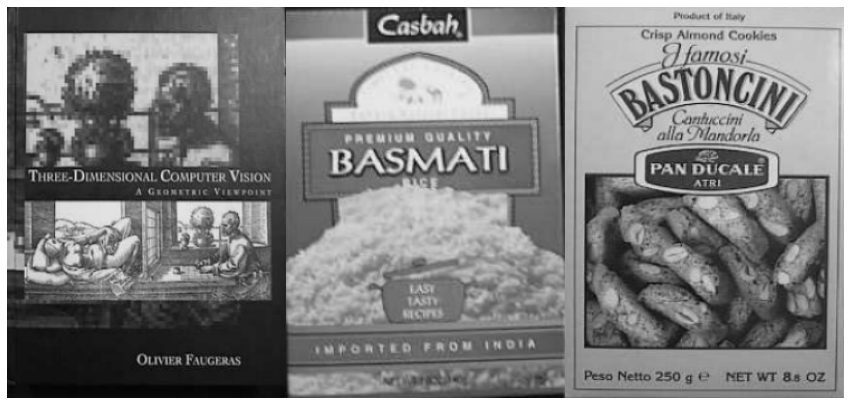

In [98]:
# Inicializar lista que contendrá las imágenes np.array,
# también una que contendrá el nombre de las imagenes
ref_imgs, ref_names = [], []

# Por cada imagen .png en img_list
for filename in img_list:
  # Obtener nombre utilizando os.path.splitext
  img_name, _ = os.path.splitext(filename)

  # Generar path del archivo con os.path.join
  img_path = os.path.join(dir_path, filename)

  # Load imagen con cv2.imread
  img = cv2.imread(img_path)

  # Resize a tamaño de 350x250px con cv2.resize
  img = cv2.resize(img, (250, 350))

  # Agregar a listas
  ref_imgs.append(img)
  ref_names.append(img_name)

# ------------------------------------------------------------------------------
# Concatenar imágenes de referencia mediante np.hstack
refs = np.hstack( ref_imgs )

# Visualizar
refs = cv2.cvtColor(refs, cv2.COLOR_BGR2RGB)

#Plotear imagen con Matplotlib
plot.figure(figsize=(15,15))
plot.imshow(refs)
plot.axis("off")

Excelente, hemos logrado generar la lista ref_images con todas nuestras imágenes de referencia. Esta lista nos permitirá recorrer y procesar las imágenes de manera más cómoda y elegante.

##Extraer Keypoints de Referencia
Ahora procesaremos esta serie de imágenes con SIFT para extraer sus KeyPoints y generar sus Descriptors correspondientes. La implementación de SIFT se encuentra en el módulo cv2.xfeatures2d el cual contiene distintos métodos de extracción de features y detección de keypoints como SIFT y SURF.

https://docs.opencv.org/3.4.2/d0/d13/classcv_1_1Feature2D.html

Para utilizar SIFT primero hay que inicializar el objeto mediante la función cv2.xfeatures2d.SIFT_create y luego utilizar la función cv2.xfeatures2d_SIFT.detectAndCompute sobre la imágen de interés para detectar los Keypoints y generar los Descriptors.

In [99]:
# Inicializar SIFT detector (cv2.xfeatures2d_SIFT)
sift = cv2.xfeatures2d.SIFT_create()

# Incializar lista que contendrá los keypoints y descriptores
# de las imágenes de referencia
ref_features = []

# Para cada una de las imágenes en ref_imgs
for img in ref_imgs:

  # Transformar a escala de grises
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Computar keypoint y descritores
  kps, des = sift.detectAndCompute(gray, mask=None)

  # Agregar a lista
  ref_features.append( (kps, des) )

Una vez generadas las features de una imagen, estas pueden ser visualizadas mediante la función cv2.drawKeypoints. Si a esta función se le entrega como parámetro flags el objeto cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, dibujará los KeyPoints utilizando la escala y orientación de estos.


(-0.5, 249.5, 349.5, -0.5)

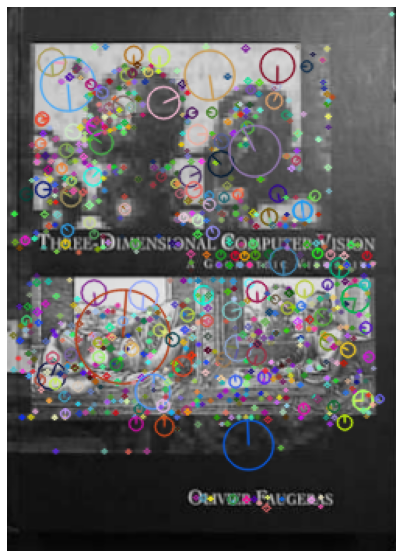

In [100]:
# Index en ref_imgs correspondiente a la imagen ref_2.png
idx = 0

# Extraer imagen y convertir a escala de grises
gray = cv2.cvtColor(ref_imgs[idx], cv2.COLOR_BGR2GRAY)

# Extraer keypoints y descriptores
kps, des = ref_features[idx]

# Generar imagen donde se dibujarán los keypoints
out = np.zeros_like(gray)

# Dibujar keypoints
out = cv2.drawKeypoints(gray, kps, out, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Plotear imagen con Matplotlib
plot.figure(figsize=(10,10))
plot.imshow(out)
plot.axis("off")

##Feature Matching

Ya que tenemos las features de nuestras imágenes de referencia en la lista ref_features, podemos pasar ahora a procesar nuestra imágen de interés `Escena.png.`

(-0.5, 530.5, 398.5, -0.5)

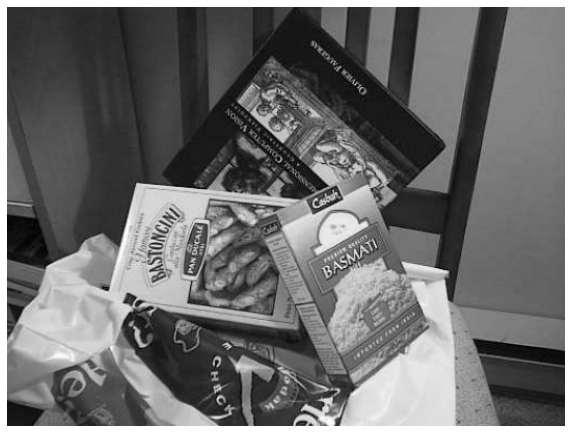

In [101]:
#Cargar imagen
img_escena = cv2.imread("Auxiliar_3//Escena.png")

#Cambiar espacio de colores (BGR A RGB)
img_rgb = cv2.cvtColor(img_escena, cv2.COLOR_BGR2RGB)

#Plotear imagen con Matplotlib
plot.figure(figsize=(10,10))
plot.imshow(img_rgb)
plot.axis("off")

Del mismo modo en el que procesamos las imágenes de referencia, extraeremos los KeyPoints y Descriptors de esta imagen utilizando el mismo objeto cv2.xfeatures2d_SIFT anteriormente inicializado.

(-0.5, 530.5, 398.5, -0.5)

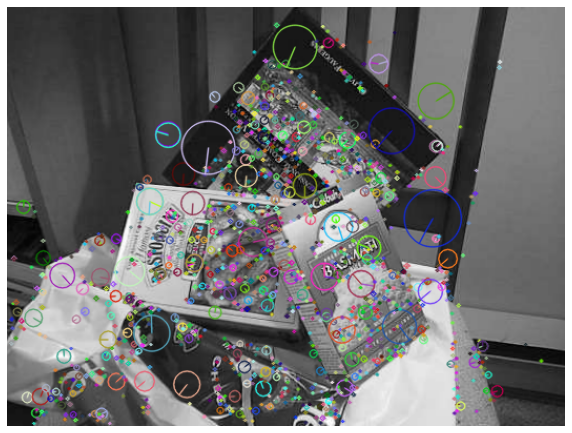

In [102]:
# Cambiar espacio de colores (RGB A GRAY)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Computar keypoint y descritores
kps_escena, des_escena = sift.detectAndCompute(img_gray, mask=None)

# Inicializar imagen para visualizar
out = np.zeros_like(img_gray)

# Dibujar keypoints
out = cv2.drawKeypoints(img_gray, kps_escena, out, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Plotear imagen con Matplotlib
plot.figure(figsize=(10,10))
plot.imshow(out)
plot.axis("off")

Ahora que tenemos las features de nuestra imagen de interés debemos, debemos realizar un matching respecto a las features de las imágenes de referencia para analizar la cantidad de coincidencias y visualizar los matches. 

Para esto, dado que los descriptores consisten en vectores de (128, ) o bien, de 128 dimensiones, podemos utilizar como criterio la distancia euclidiana para evaluar que tan similares son dos Descriptors entre si o que tan cerca se encuentran en este espacio de 128 dimensiones. Así, realizaremos un matching de fuerza bruta mediante un cv2.BFMatcher, el cual a partir de un set de descriptores de query buscará los descriptores más cercanos en un set de reference para cada descriptor en el primer set.

https://docs.opencv.org/3.4/d3/da1/classcv_1_1BFMatcher.html

No obstante, ¿cómo podemos validar si los matches realizados por cv2.BFMatcher son buenas coincidencias?, pues siempre se podrá encontrar el descriptor más cercano a otro, incluso si estos no se encuentran a poca distancia.

Para resolver esto D. Lowe propone utilizar un Ratio Test para validar los matches. Primero, en vez de buscar el descriptor más cercano a otro, se buscan los 2 descriptores más cercanos. Luego, bajo el supuesto de que los descriptores generados por SIFT son lo suficientemente distintivos, no debiese ser posible que hayan dos coincidencias o matches. Así, si existe un match válido, la distancia de la primera coincidencia debería ser considerablemente menor a la de la segunda. Dicho de otra forma, si ambas distancias de match son similares, entonces la verdad es que no se hayó ninguna coincidencia significativa.

Para obtener los k descriptores más cercanos, podemos usar el método cv2.BFMatcher.knnMatch.

(-0.5, 780.5, 398.5, -0.5)

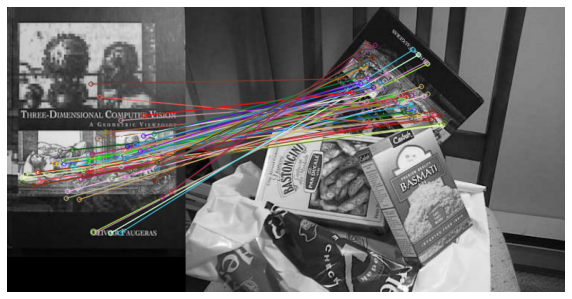

In [103]:
# Index en ref_imgs correspondiente a la imagen ref_i.png
idx = 0

# Extraer imagen de referencia
img_ref = ref_imgs[idx]

# Extraer keypoints y descriptores
kps_ref, des_ref = ref_features[idx]

# Inicializar BruteForce Matcher
# con criterio de distancia euclidiana, cv2.NORM_L2
BruteForce = cv2.BFMatcher()

# Para cada decriptor de img_01.jpg, encontrar los 2 mejores matches
# con respecto a los descriptores de las imágenes de referencia
matches = BruteForce.knnMatch(des_ref, des_escena, k=2)

# Por cada par de matches (match_1, match_2) obtenido
# para cada descriptor en des_ref
good_matches = []
for match_1, match_2 in matches:
  # Aplicar ratio test para filtrar matches
  ratio = 0.5
  if match_1.distance < ratio*match_2.distance:
    good_matches.append([match_1])

# cv2.drawMatchesKnn expects list of lists as matches.
outImg	=	cv2.drawMatchesKnn(img_ref, kps_ref, img_escena, kps_escena, good_matches,None, 
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#Plotear imagen con Matplotlib
plot.figure(figsize=(10,10))
plot.imshow(outImg)
plot.axis("off") 